In [73]:
import numpy as np
import pandas as pd

@author: MUSTAFA YALINIZ    

In [74]:
# Veriyi oku
data = pd.read_csv('veriler.csv')

In [75]:
# Bagimli bagimsiz degisken olarak ayir
X = data.iloc[:, 1:4].values
Y = data.iloc[:, 4].values

In [76]:
# Egitim ve test verisi olarak ayir
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [77]:
# Modeli egit
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy') # criterion= gini de kullanilabilir
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [78]:
# Confusion matrixini olustur hatalari ogren 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
print(cm)
true = cm[1,1]+cm[0,0]
false = cm[1,0]
print(f'{true+false} durumdan, Dogru: {true}, Yanlis: {false}')

[[1 0]
 [1 6]]
8 durumdan, Dogru: 7, Yanlis: 1


In [79]:
# X_testin sutun ortalamsini al 
X_mean = np.mean(X_test, axis=1)
X_mean = X_mean.reshape(-1,1)

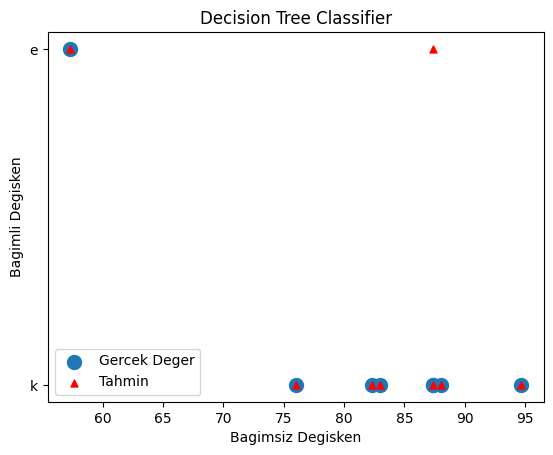

In [80]:
# Goruntu olustur
from matplotlib import pyplot as plt 
plt.scatter(X_mean, Y_test, marker='o',label='Gercek Deger',s=100)
plt.scatter(X_mean, model.predict(X_test), color='red', marker='^',label='Tahmin',s=25)
plt.xlabel("Bagimsiz Degisken")
plt.ylabel("Bagimli Degisken")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()